Taken from website:-
https://ourworldindata.org/coronavirus-source-data

Import libraries

In [1]:
import pandas as pd
import numpy as np

Read files

In [2]:
# load datasets
train = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')
train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56650,ZWE,Africa,Zimbabwe,2020-12-23,12656.0,112.0,129.571,330.0,4.0,2.429,851.515,7.536,8.718,22.203,0.269,0.163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1501.0,203022.0,13.66,0.101,1710.0,0.115,0.076,13.2,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56651,ZWE,Africa,Zimbabwe,2020-12-24,12786.0,130.0,131.429,339.0,9.0,3.571,860.261,8.747,8.843,22.808,0.606,0.240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56652,ZWE,Africa,Zimbabwe,2020-12-25,12880.0,94.0,119.000,341.0,2.0,3.571,866.586,6.324,8.006,22.943,0.135,0.240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
56653,ZWE,Africa,Zimbabwe,2020-12-26,12963.0,83.0,116.000,341.0,0.0,3.286,872.170,5.584,7.805,22.943,0.000,0.221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56655 entries, 0 to 56654
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            56330 non-null  object 
 1   continent                           55989 non-null  object 
 2   location                            56655 non-null  object 
 3   date                                56655 non-null  object 
 4   total_cases                         56098 non-null  float64
 5   new_cases                           56092 non-null  float64
 6   new_cases_smoothed                  55136 non-null  float64
 7   total_deaths                        47888 non-null  float64
 8   new_deaths                          47887 non-null  float64
 9   new_deaths_smoothed                 55136 non-null  float64
 10  total_cases_per_million             55773 non-null  float64
 11  new_cases_per_million               55767

Convert date to number

In [4]:
import datetime 

date = train.date

train['date'] = pd.to_datetime(train['date'], errors='coerce')
train['date_num'] = train['date'].dt.strftime('%d%m%Y')
train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,24022020
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,25022020
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,26022020
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,27022020
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,28022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56650,ZWE,Africa,Zimbabwe,2020-12-23,12656.0,112.0,129.571,330.0,4.0,2.429,851.515,7.536,8.718,22.203,0.269,0.163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1501.0,203022.0,13.66,0.101,1710.0,0.115,0.076,13.2,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,23122020
56651,ZWE,Africa,Zimbabwe,2020-12-24,12786.0,130.0,131.429,339.0,9.0,3.571,860.261,8.747,8.843,22.808,0.606,0.240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,24122020
56652,ZWE,Africa,Zimbabwe,2020-12-25,12880.0,94.0,119.000,341.0,2.0,3.571,866.586,6.324,8.006,22.943,0.135,0.240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,25122020
56653,ZWE,Africa,Zimbabwe,2020-12-26,12963.0,83.0,116.000,341.0,0.0,3.286,872.170,5.584,7.805,22.943,0.000,0.221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535,26122020


Country

In [5]:
country = train['location'].to_list()

# using naive method to remove duplicated from list  
list_country = [] 
for i in country: 
    if i not in list_country: 
        list_country.append(i) 

list_country

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Ko

In [6]:
print(len(list_country))

192


Get latest date

In [7]:
last_date = date.max()
last_date

'2020-12-27'

In [8]:
print(type(last_date))

<class 'str'>


In [9]:
from datetime import datetime

format = '%Y-%m-%d'
dt = datetime.strptime(last_date, format)
print(dt)

2020-12-27 00:00:00


In [10]:
from datetime import datetime, time, timedelta

next_day = dt + timedelta(days=1)
print(next_day)

2020-12-28 00:00:00


In [11]:
last_date = train[train.date == train.date.max()]
last_date

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
307,AFG,Asia,Afghanistan,2020-12-27,51039.0,153.0,174.571,2160.0,11.0,13.286,1311.101,3.930,4.484,55.487,0.283,0.341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.498,27122020
601,ALB,Europe,Albania,2020-12-27,56254.0,499.0,464.429,1153.0,10.0,9.286,19547.571,173.396,161.383,400.653,3.475,3.227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.785,27122020
908,DZA,Africa,Algeria,2020-12-27,98249.0,392.0,435.143,2728.0,6.0,8.857,2240.517,8.939,9.923,62.211,0.137,0.202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754,27122020
1209,AND,Europe,Andorra,2020-12-27,7821.0,15.0,34.857,83.0,0.0,0.286,101223.063,194.137,451.138,1074.225,0.000,3.698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.858,27122020
1492,AGO,Africa,Angola,2020-12-27,17240.0,91.0,85.143,399.0,0.0,1.714,524.550,2.769,2.591,12.140,0.000,0.052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.286627e+07,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,27122020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55483,VNM,Asia,Vietnam,2020-12-27,1441.0,1.0,4.000,35.0,0.0,0.000,14.804,0.010,0.041,0.360,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.694,27122020
55824,OWID_WRL,NaN,World,2020-12-27,80783674.0,432076.0,565741.143,1764863.0,7206.0,10236.857,10363.792,55.431,72.579,226.415,0.924,1.313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN,27122020
56086,YEM,Asia,Yemen,2020-12-27,2094.0,2.0,1.000,607.0,1.0,0.143,70.207,0.067,0.034,20.351,0.034,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.982597e+07,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452,27122020
56371,ZMB,Africa,Zambia,2020-12-27,19834.0,163.0,159.714,383.0,1.0,1.429,1078.876,8.866,8.688,20.833,0.054,0.078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.838396e+07,22.995,17.7,2.480,1.542,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588,27122020


Graphical representation

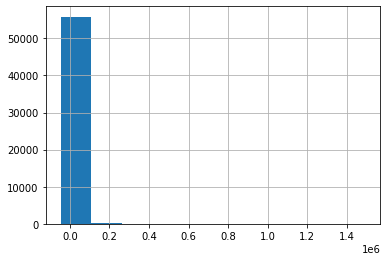

In [12]:
from matplotlib import pyplot as plt

train.new_cases.hist()

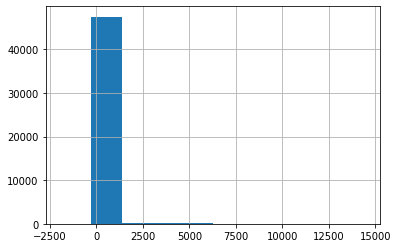

In [13]:
train.new_deaths.hist()

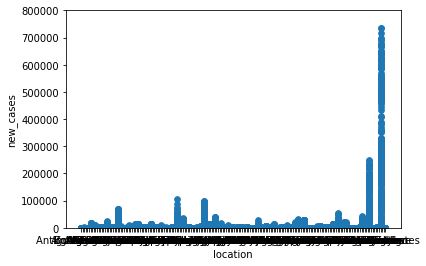

In [14]:
var = 'location'
data = pd.concat([train['new_cases'], train[var]], axis=1)
data.plot.scatter(x=var, y='new_cases', ylim=(0,800000), s=32);

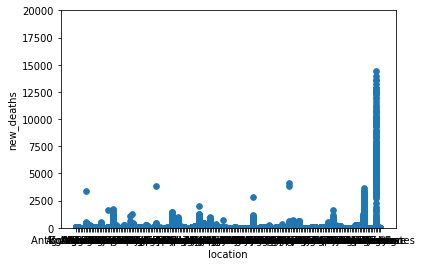

In [15]:
var = 'location'
data = pd.concat([train['new_deaths'], train[var]], axis=1)
data.plot.scatter(x=var, y='new_deaths', ylim=(0,20000), s=32);

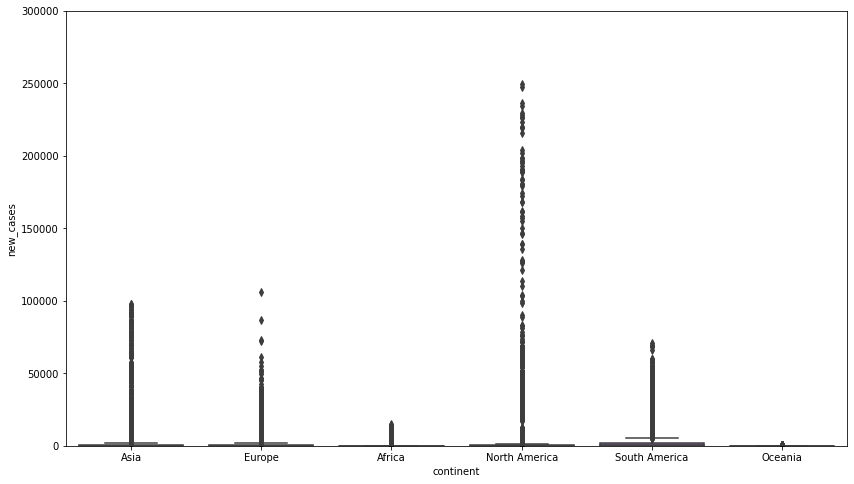

In [16]:
import seaborn as sns

var = 'continent'
data = pd.concat([train['new_cases'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_cases", data=data)
fig.axis(ymin=0, ymax=300000);

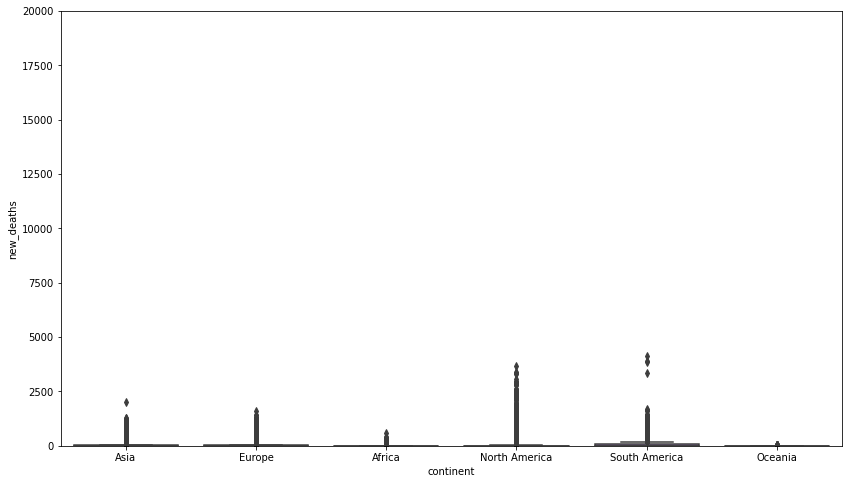

In [17]:
var = 'continent'
data = pd.concat([train['new_deaths'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_deaths", data=data)
fig.axis(ymin=0, ymax=20000);

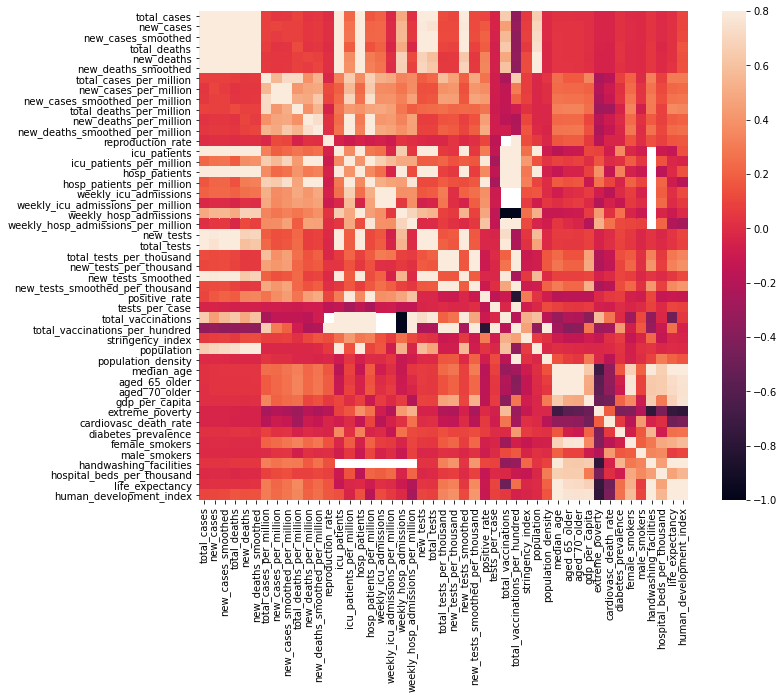

In [18]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

UK

In [19]:
country = "United Kingdom"

include_uk = train[train['location'].values == country]
exclude_uk = train[train['location'].values != country]
uk_cov19 = include_uk
uk_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
53259,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,31012020
53260,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,01022020
53261,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,02022020
53262,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,0.118,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,03022020
53263,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,0.118,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,04022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53586,GBR,Europe,United Kingdom,2020-12-23,2155996.0,39387.0,33894.286,69157.0,748.0,505.571,31759.065,580.193,499.282,1018.723,11.018,7.447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507384.0,49434314.0,728.196,7.474,437220.0,6.441,0.078,12.9,tests performed,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,23122020
53587,GBR,Europe,United Kingdom,2020-12-24,2195144.0,39148.0,34410.857,69732.0,575.0,511.714,32335.737,576.673,506.892,1027.193,8.470,7.538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800000.0,1.18,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,24122020
53588,GBR,Europe,United Kingdom,2020-12-25,2227947.0,32803.0,35017.000,70302.0,570.0,523.143,32818.945,483.207,515.821,1035.589,8.396,7.706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,25122020
53589,GBR,Europe,United Kingdom,2020-12-26,2262735.0,34788.0,36094.000,70513.0,211.0,476.571,33331.392,512.447,531.685,1038.697,3.108,7.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922,26122020


Graph of new cases

Text(0, 0.5, 'uk_new_cases')

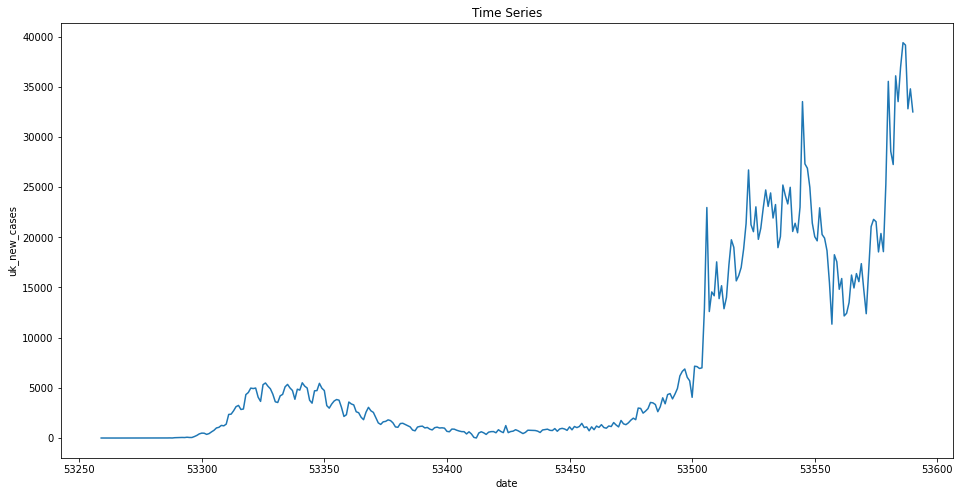

In [20]:
import matplotlib.pyplot as plt

uk_cov19['new_cases'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("uk_new_cases")

Graph of new deaths

Text(0, 0.5, 'uk_new_deaths')

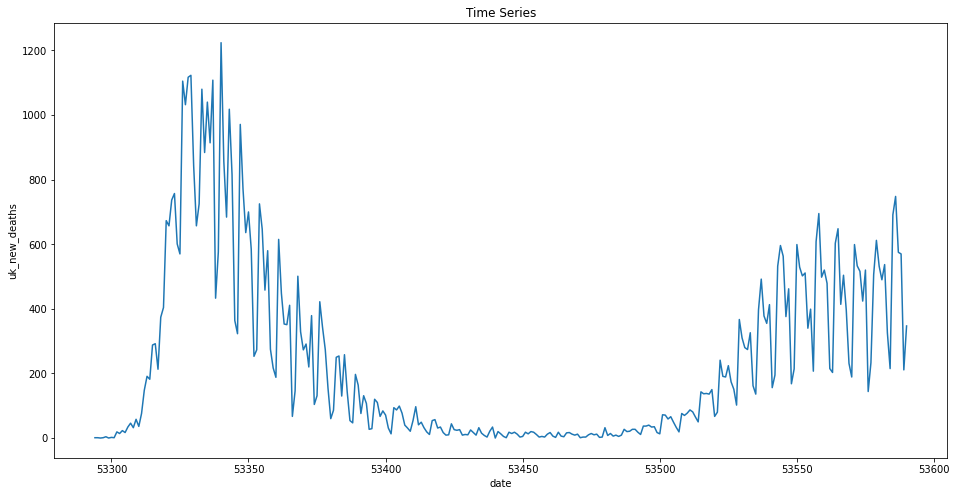

In [21]:
uk_cov19['new_deaths'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("uk_new_deaths")

Text(0, 0.5, 'uk_new_deaths_per_million')

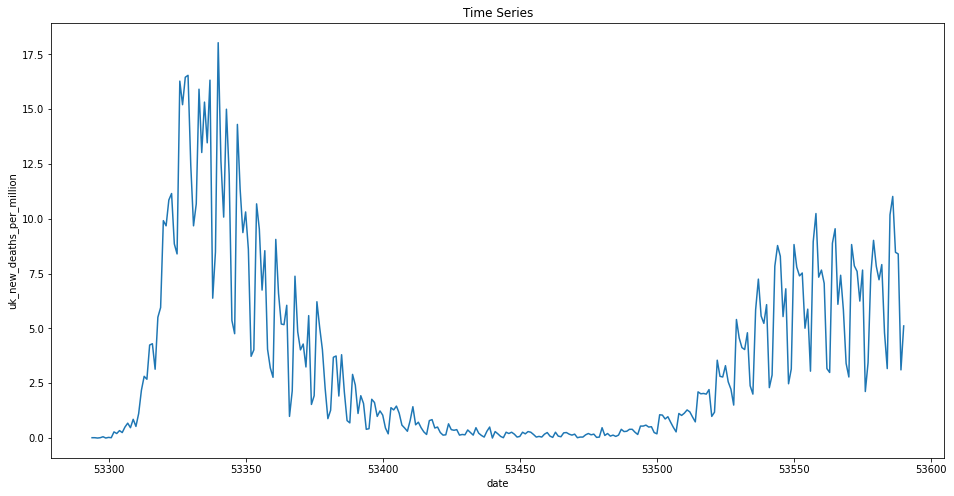

In [22]:
uk_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("uk_new_deaths_per_million")

US

In [23]:
country = "United States"

include_us = train[train['location'].values == country]
exclude_us = train[train['location'].values != country]
us_cov19 = include_us
us_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
53591,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,22012020
53592,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,23012020
53593,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,24012020
53594,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,25012020
53595,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,26012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53927,USA,North America,United States,2020-12-23,18458373.0,228131.0,212142.429,326124.0,3359.0,2668.714,55765.031,689.212,640.909,985.261,10.148,8.063,NaN,22489.0,67.942,119463.0,360.913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1008025.0,0.30,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,23122020
53928,USA,North America,United States,2020-12-24,18656776.0,198403.0,206741.286,329023.0,2899.0,2604.857,56364.431,599.400,624.591,994.019,8.758,7.870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,24122020
53929,USA,North America,United States,2020-12-25,18756360.0,99584.0,185294.857,330246.0,1223.0,2376.571,56665.287,300.856,559.799,997.714,3.695,7.180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,25122020
53930,USA,North America,United States,2020-12-26,18982634.0,226274.0,189577.571,331909.0,1663.0,2250.000,57348.889,683.602,572.737,1002.738,5.024,6.798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1944585.0,0.59,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,1

Text(0, 0.5, 'us_new_cases')

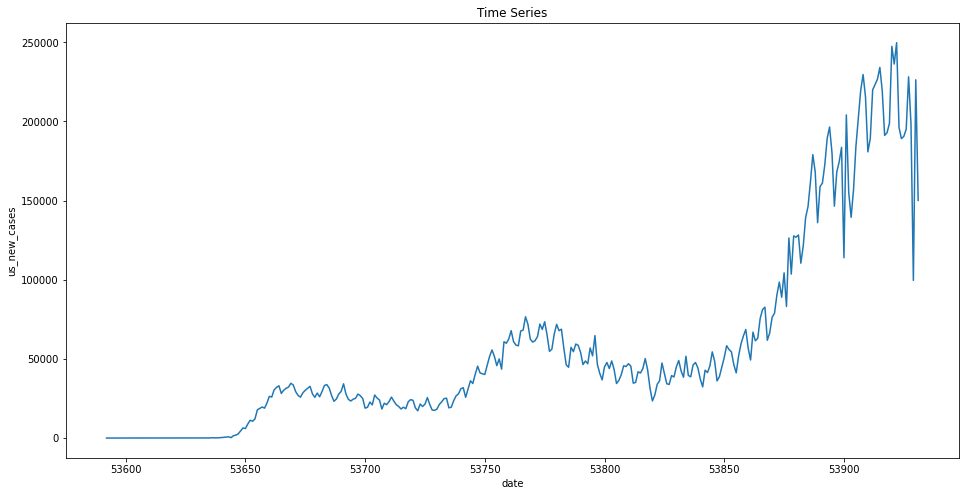

In [24]:
us_cov19['new_cases'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_cases")

Text(0, 0.5, 'us_new_deaths')

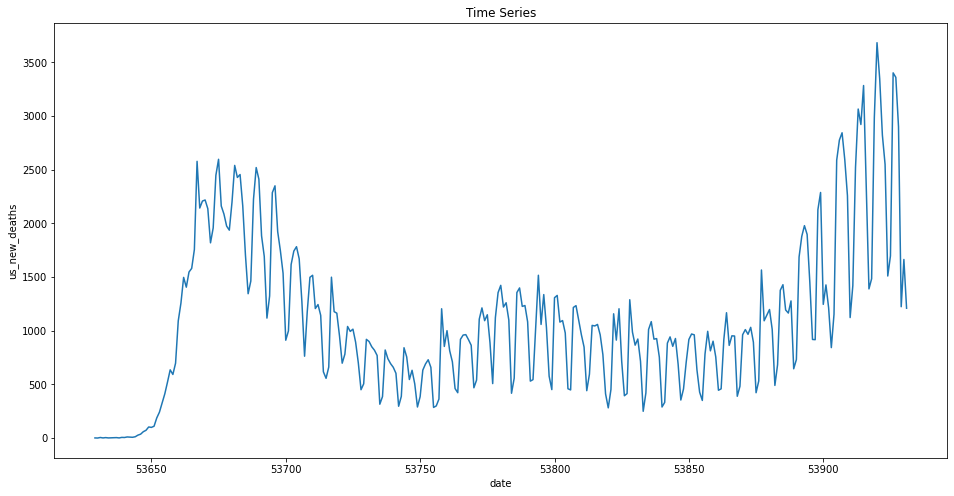

In [25]:
us_cov19['new_deaths'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_deaths")

Text(0, 0.5, 'us_new_deaths_per_million')

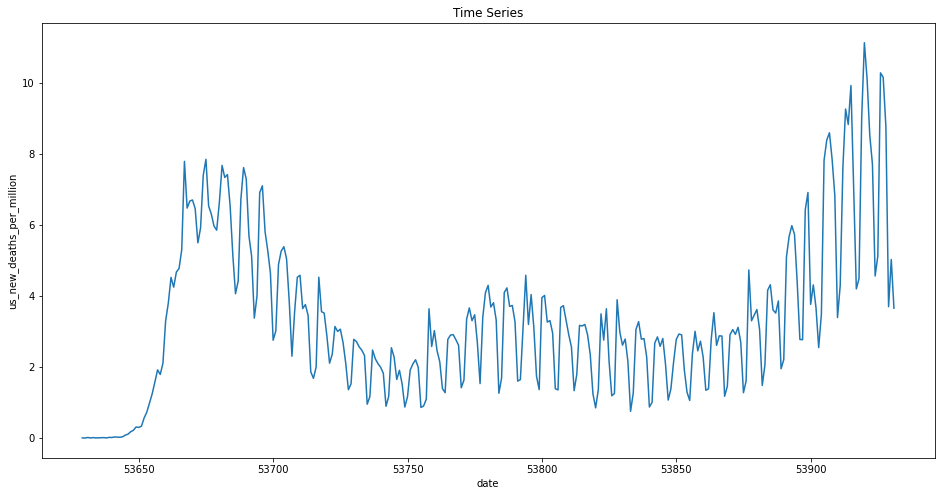

In [26]:
us_cov19['new_deaths_per_million'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("us_new_deaths_per_million")

Compare new cases per million to new deaths per million

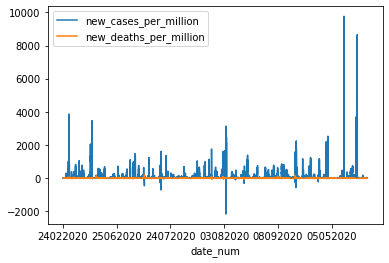

In [27]:
train.plot(x="date_num", y=["new_cases_per_million", "new_deaths_per_million"])

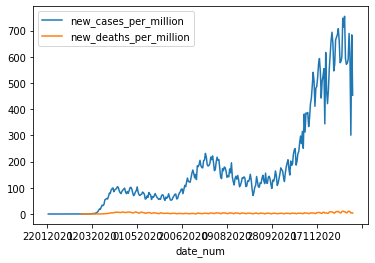

In [28]:
us_cov19.plot(x="date_num", y=["new_cases_per_million", "new_deaths_per_million"])

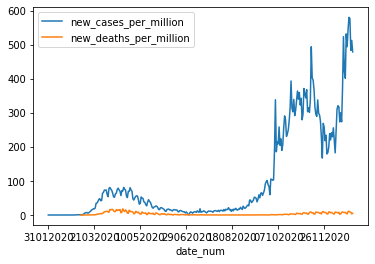

In [29]:
uk_cov19.plot(x="date_num", y=["new_cases_per_million", "new_deaths_per_million"])

Compare US to UK

In [30]:
revised_us_cov19 = us_cov19[9:]
revised_us_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
53600,USA,North America,United States,2020-01-31,8.0,2.0,0.857,NaN,NaN,0.000,0.024,0.006,0.003,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,31012020
53601,USA,North America,United States,2020-02-01,8.0,0.0,0.857,NaN,NaN,0.000,0.024,0.000,0.003,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,01022020
53602,USA,North America,United States,2020-02-02,8.0,0.0,0.429,NaN,NaN,0.000,0.024,0.000,0.001,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,02022020
53603,USA,North America,United States,2020-02-03,11.0,3.0,0.857,NaN,NaN,0.000,0.033,0.009,0.003,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,03022020
53604,USA,North America,United States,2020-02-04,11.0,0.0,0.857,NaN,NaN,0.000,0.033,0.000,0.003,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,04022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53927,USA,North America,United States,2020-12-23,18458373.0,228131.0,212142.429,326124.0,3359.0,2668.714,55765.031,689.212,640.909,985.261,10.148,8.063,NaN,22489.0,67.942,119463.0,360.913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1008025.0,0.30,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,23122020
53928,USA,North America,United States,2020-12-24,18656776.0,198403.0,206741.286,329023.0,2899.0,2604.857,56364.431,599.400,624.591,994.019,8.758,7.870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,24122020
53929,USA,North America,United States,2020-12-25,18756360.0,99584.0,185294.857,330246.0,1223.0,2376.571,56665.287,300.856,559.799,997.714,3.695,7.180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924,25122020
53930,USA,North America,United States,2020-12-26,18982634.0,226274.0,189577.571,331909.0,1663.0,2250.000,57348.889,683.602,572.737,1002.738,5.024,6.798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1944585.0,0.59,NaN,331002647.0,35.60

In [31]:
uk_cov19.new_cases_per_million.shape, revised_us_cov19.new_cases_per_million.shape, uk_cov19.new_deaths_per_million.shape, revised_us_cov19.new_deaths_per_million.shape

((332,), (332,), (332,), (332,))

In [32]:
uk_v_us=pd.DataFrame({'uk_date': uk_cov19.date,'uk_new_cse_pr_million': uk_cov19.new_cases_per_million, 'uk_new_dth_pr_million': uk_cov19.new_deaths_per_million, 'us_date':revised_us_cov19.date, 'us_new_cse_pr_million': revised_us_cov19.new_cases_per_million, 'us_new_dth_pr_million':revised_us_cov19.new_deaths_per_million})
uk_v_us.reset_index(drop=True, inplace=True)
uk_v_us

,uk_date,uk_new_cse_pr_million,uk_new_dth_pr_million,us_date,us_new_cse_pr_million,us_new_dth_pr_million
0,2020-01-31,0.029,NaN,NaT,NaN,NaN
1,2020-02-01,0.000,NaN,NaT,NaN,NaN
2,2020-02-02,0.000,NaN,NaT,NaN,NaN
3,2020-02-03,0.088,NaN,NaT,NaN,NaN
4,2020-02-04,0.000,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...
659,NaT,NaN,NaN,2020-12-23,689.212,10.148
660,NaT,NaN,NaN,2020-12-24,599.400,8.758
661,NaT,NaN,NaN,2020-12-25,300.856,3.695
662,NaT,NaN,NaN,2020-12-26,683.602,5.024


In [33]:
ukus1 = uk_v_us[0:len(uk_cov19)]
ukus1 = ukus1.drop(['us_date', 'us_new_cse_pr_million', 'us_new_dth_pr_million'], axis=1)
ukus1

,uk_date,uk_new_cse_pr_million,uk_new_dth_pr_million
0,2020-01-31,0.029,NaN
1,2020-02-01,0.000,NaN
2,2020-02-02,0.000,NaN
3,2020-02-03,0.088,NaN
4,2020-02-04,0.000,NaN
...,...,...,...
327,2020-12-23,580.193,11.018
328,2020-12-24,576.673,8.470
329,2020-12-25,483.207,8.396
330,2020-12-26,512.447,3.108


In [34]:
ukus1.rename(columns = {'uk_date':'date'}, inplace = True)
ukus1

,date,uk_new_cse_pr_million,uk_new_dth_pr_million
0,2020-01-31,0.029,NaN
1,2020-02-01,0.000,NaN
2,2020-02-02,0.000,NaN
3,2020-02-03,0.088,NaN
4,2020-02-04,0.000,NaN
...,...,...,...
327,2020-12-23,580.193,11.018
328,2020-12-24,576.673,8.470
329,2020-12-25,483.207,8.396
330,2020-12-26,512.447,3.108


In [35]:
ukus2 = uk_v_us[len(uk_cov19):]
ukus2 = ukus2.drop(['uk_date', 'uk_new_cse_pr_million', 'uk_new_dth_pr_million'], axis=1)
ukus2

,us_date,us_new_cse_pr_million,us_new_dth_pr_million
332,2020-01-31,0.006,NaN
333,2020-02-01,0.000,NaN
334,2020-02-02,0.000,NaN
335,2020-02-03,0.009,NaN
336,2020-02-04,0.000,NaN
...,...,...,...
659,2020-12-23,689.212,10.148
660,2020-12-24,599.400,8.758
661,2020-12-25,300.856,3.695
662,2020-12-26,683.602,5.024


In [36]:
ukus2.rename(columns = {'us_date':'date'}, inplace = True)
ukus2

,date,us_new_cse_pr_million,us_new_dth_pr_million
332,2020-01-31,0.006,NaN
333,2020-02-01,0.000,NaN
334,2020-02-02,0.000,NaN
335,2020-02-03,0.009,NaN
336,2020-02-04,0.000,NaN
...,...,...,...
659,2020-12-23,689.212,10.148
660,2020-12-24,599.400,8.758
661,2020-12-25,300.856,3.695
662,2020-12-26,683.602,5.024


In [37]:
ukus = pd.merge(ukus1, ukus2, on="date")
ukus

,date,uk_new_cse_pr_million,uk_new_dth_pr_million,us_new_cse_pr_million,us_new_dth_pr_million
0,2020-01-31,0.029,NaN,0.006,NaN
1,2020-02-01,0.000,NaN,0.000,NaN
2,2020-02-02,0.000,NaN,0.000,NaN
3,2020-02-03,0.088,NaN,0.009,NaN
4,2020-02-04,0.000,NaN,0.000,NaN
...,...,...,...,...,...
327,2020-12-23,580.193,11.018,689.212,10.148
328,2020-12-24,576.673,8.470,599.400,8.758
329,2020-12-25,483.207,8.396,300.856,3.695
330,2020-12-26,512.447,3.108,683.602,5.024


In [38]:
ukus.isnull().sum()

date                      0
uk_new_cse_pr_million     0
uk_new_dth_pr_million    35
us_new_cse_pr_million     0
us_new_dth_pr_million    29
dtype: int64

In [39]:
ukus.fillna(0,inplace=True)

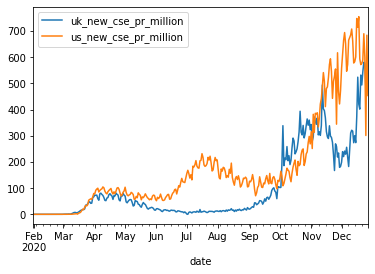

In [40]:
ukus.plot(x="date", y=["uk_new_cse_pr_million", "us_new_cse_pr_million"])

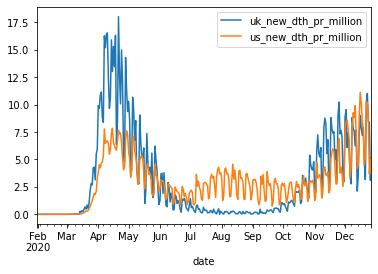

In [41]:
ukus.plot(x="date", y=["uk_new_dth_pr_million", "us_new_dth_pr_million"])

Check for null values

In [42]:
train.isnull().sum()

iso_code                                325
continent                               666
location                                  0
date                                      0
total_cases                             557
new_cases                               563
new_cases_smoothed                     1519
total_deaths                           8767
new_deaths                             8768
new_deaths_smoothed                    1519
total_cases_per_million                 882
new_cases_per_million                   888
new_cases_smoothed_per_million         1839
total_deaths_per_million               9079
new_deaths_per_million                 9080
new_deaths_smoothed_per_million        1839
reproduction_rate                     14152
icu_patients                          50460
icu_patients_per_million              50460
hosp_patients                         49728
hosp_patients_per_million             49728
weekly_icu_admissions                 56127
weekly_icu_admissions_per_millio

Impute missing values

In [43]:
train = train.drop(['date'], axis=1)

In [44]:
train.dtypes[train.dtypes != 'int64'][train.dtypes != 'float64']

iso_code       object
continent      object
location       object
tests_units    object
date_num       object
dtype: object

Impute null values in categorical columns

In [45]:
train['iso_code'] = train['iso_code'].fillna('Not Listed')
train['continent'] = train['continent'].fillna('Not Listed')
train['location'] = train['location'].fillna('Not Listed')
train['tests_units'] = train['tests_units'].fillna('Not Listed')

Impute numeric columns with 0

In [46]:
train.fillna(0,inplace=True)

Ordinal encoder

In [47]:
#ordinal encoder
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

train.iso_code = enc.fit_transform(train.iso_code.values.reshape(-1,1))
train.continent = enc.fit_transform(train.continent.values.reshape(-1,1))
train.location = enc.fit_transform(train.location.values.reshape(-1,1))
train.tests_units = enc.fit_transform(train.tests_units.values.reshape(-1,1))

Define X and y

In [48]:
iso_code = train.iso_code

y = train[['new_cases', 'new_deaths']]
X = train.drop(['iso_code', 'new_cases', 'new_deaths', 'total_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 
                 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 
                 'new_deaths_smoothed_per_million'], axis=1)

Standard Scaler

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [50]:
y

,new_cases,new_deaths
0,1.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
56650,112.0,4.0
56651,130.0,9.0
56652,94.0,2.0
56653,83.0,0.0


In [51]:
X

array([[-0.41474845, -1.70968726, -1.40136874, ..., -0.70674858,
        -0.88812699,  0.92580872],
       [-0.41474845, -1.70968726, -1.40136874, ..., -0.70674858,
        -0.88812699,  1.0401698 ],
       [-0.41474845, -1.70968726, -1.40136874, ..., -0.70674858,
        -0.88812699,  1.15453087],
       ...,
       [-1.02811799,  1.73367153, -1.40136874, ..., -1.01989047,
        -0.71213105,  1.05160591],
       [-1.02811799,  1.73367153, -1.40136874, ..., -1.01989047,
        -0.71213105,  1.16596698],
       [-1.02811799,  1.73367153, -1.40136874, ..., -1.01989047,
        -0.71213105,  1.28032805]])

Split training file up for training and validation

In [52]:
#split train set for testing
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=1, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((50989, 39), (5666, 39), (50989, 2), (5666, 2))

Select model

In [53]:
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

model = MultiOutputRegressor(HistGradientBoostingRegressor(max_iter=2000, random_state=1)).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9915612570775949


Predict on validation set

In [54]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_val)
y_pred = y_pred.astype(int)
y_pred[y_pred < 0] = 0
print(model.score(X_val, y_val)), print(r2_score(y_pred, model.predict(X_val)))

0.8316256297622704
0.9969497728951422


(None, None)

In [55]:
y_val

,new_cases,new_deaths
17487,0.0,0.0
10189,0.0,0.0
1183,45.0,0.0
20497,16.0,0.0
48065,383.0,5.0
...,...,...
23223,21.0,0.0
29286,13.0,0.0
53828,39442.0,1288.0
50082,42.0,0.0


In [56]:
y_pred

array([[  135,     2],
       [    0,     0],
       [    0,    49],
       ...,
       [38292,   983],
       [   67,     1],
       [    0,     0]])

In [57]:
y_val.iloc[:,0]

17487        0.0
10189        0.0
1183        45.0
20497       16.0
48065      383.0
          ...   
23223       21.0
29286       13.0
53828    39442.0
50082       42.0
980          3.0
Name: new_cases, Length: 5666, dtype: float64

In [58]:
y_val.iloc[:,1]

17487       0.0
10189       0.0
1183        0.0
20497       0.0
48065       5.0
          ...  
23223       0.0
29286       0.0
53828    1288.0
50082       0.0
980         0.0
Name: new_deaths, Length: 5666, dtype: float64

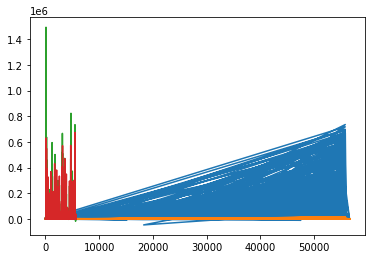

In [59]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train] + [x for x in y_val.new_cases])
pyplot.plot([None for i in y_train] + [x for x in y_pred[:,0]])
pyplot.show()

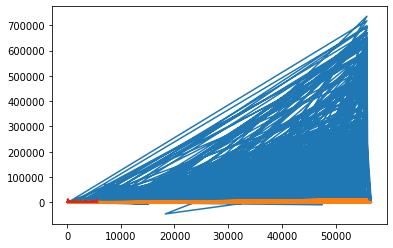

In [60]:
pyplot.plot(y_train)
pyplot.plot([None for i in y_train] + [x for x in y_val.new_deaths])
pyplot.plot([None for i in y_train] + [x for x in y_pred[:,1]])
pyplot.show()

Put predictions in dataframe

In [61]:
df_val=pd.DataFrame({'actual_cases': y_val.new_cases, 'predicted_cases': y_pred[:,0], 'actual_deaths': y_val.new_deaths, 'predicted_deaths':y_pred[:,1]})
df_val.reset_index(drop=True, inplace=True)
df_val

,actual_cases,predicted_cases,actual_deaths,predicted_deaths
0,0.0,135,0.0,2
1,0.0,0,0.0,0
2,45.0,0,0.0,49
3,16.0,46,0.0,0
4,383.0,373,5.0,7
...,...,...,...,...
5661,21.0,0,0.0,45
5662,13.0,29,0.0,1
5663,39442.0,38292,1288.0,983
5664,42.0,67,0.0,1


Create test dataset

In [62]:
test = last_date
test.date = next_day
test

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
307,AFG,Asia,Afghanistan,2020-12-28,51039.0,153.0,174.571,2160.0,11.0,13.286,1311.101,3.930,4.484,55.487,0.283,0.341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.498,27122020
601,ALB,Europe,Albania,2020-12-28,56254.0,499.0,464.429,1153.0,10.0,9.286,19547.571,173.396,161.383,400.653,3.475,3.227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.785,27122020
908,DZA,Africa,Algeria,2020-12-28,98249.0,392.0,435.143,2728.0,6.0,8.857,2240.517,8.939,9.923,62.211,0.137,0.202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754,27122020
1209,AND,Europe,Andorra,2020-12-28,7821.0,15.0,34.857,83.0,0.0,0.286,101223.063,194.137,451.138,1074.225,0.000,3.698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.858,27122020
1492,AGO,Africa,Angola,2020-12-28,17240.0,91.0,85.143,399.0,0.0,1.714,524.550,2.769,2.591,12.140,0.000,0.052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.286627e+07,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,27122020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55483,VNM,Asia,Vietnam,2020-12-28,1441.0,1.0,4.000,35.0,0.0,0.000,14.804,0.010,0.041,0.360,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.694,27122020
55824,OWID_WRL,NaN,World,2020-12-28,80783674.0,432076.0,565741.143,1764863.0,7206.0,10236.857,10363.792,55.431,72.579,226.415,0.924,1.313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN,27122020
56086,YEM,Asia,Yemen,2020-12-28,2094.0,2.0,1.000,607.0,1.0,0.143,70.207,0.067,0.034,20.351,0.034,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.982597e+07,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452,27122020
56371,ZMB,Africa,Zambia,2020-12-28,19834.0,163.0,159.714,383.0,1.0,1.429,1078.876,8.866,8.688,20.833,0.054,0.078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.838396e+07,22.995,17.7,2.480,1.542,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588,27122020


Convert date to number

In [63]:
import datetime 

test['date_num'] = test['date'].dt.strftime('%d%m%Y')
test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
307,AFG,Asia,Afghanistan,2020-12-28,51039.0,153.0,174.571,2160.0,11.0,13.286,1311.101,3.930,4.484,55.487,0.283,0.341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.498,28122020
601,ALB,Europe,Albania,2020-12-28,56254.0,499.0,464.429,1153.0,10.0,9.286,19547.571,173.396,161.383,400.653,3.475,3.227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.785,28122020
908,DZA,Africa,Algeria,2020-12-28,98249.0,392.0,435.143,2728.0,6.0,8.857,2240.517,8.939,9.923,62.211,0.137,0.202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754,28122020
1209,AND,Europe,Andorra,2020-12-28,7821.0,15.0,34.857,83.0,0.0,0.286,101223.063,194.137,451.138,1074.225,0.000,3.698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.858,28122020
1492,AGO,Africa,Angola,2020-12-28,17240.0,91.0,85.143,399.0,0.0,1.714,524.550,2.769,2.591,12.140,0.000,0.052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.286627e+07,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,28122020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55483,VNM,Asia,Vietnam,2020-12-28,1441.0,1.0,4.000,35.0,0.0,0.000,14.804,0.010,0.041,0.360,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.694,28122020
55824,OWID_WRL,NaN,World,2020-12-28,80783674.0,432076.0,565741.143,1764863.0,7206.0,10236.857,10363.792,55.431,72.579,226.415,0.924,1.313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN,28122020
56086,YEM,Asia,Yemen,2020-12-28,2094.0,2.0,1.000,607.0,1.0,0.143,70.207,0.067,0.034,20.351,0.034,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.982597e+07,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452,28122020
56371,ZMB,Africa,Zambia,2020-12-28,19834.0,163.0,159.714,383.0,1.0,1.429,1078.876,8.866,8.688,20.833,0.054,0.078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.838396e+07,22.995,17.7,2.480,1.542,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588,28122020


Check for null values

In [64]:
test.isnull().sum()

iso_code                                1
continent                               2
location                                0
date                                    0
total_cases                             0
new_cases                               0
new_cases_smoothed                      0
total_deaths                           15
new_deaths                             15
new_deaths_smoothed                     0
total_cases_per_million                 1
new_cases_per_million                   1
new_cases_smoothed_per_million          1
total_deaths_per_million               16
new_deaths_per_million                 16
new_deaths_smoothed_per_million         1
reproduction_rate                     191
icu_patients                          191
icu_patients_per_million              191
hosp_patients                         191
hosp_patients_per_million             191
weekly_icu_admissions                 191
weekly_icu_admissions_per_million     191
weekly_hosp_admissions            

Impute missing values

In [65]:
predict_date = test.date

test = test.drop(['date'], axis=1)

In [66]:
test.dtypes[test.dtypes != 'int64'][test.dtypes != 'float64']

iso_code       object
continent      object
location       object
tests_units    object
date_num       object
dtype: object

Impute categorical values

In [67]:
test['iso_code'] = test['iso_code'].fillna('Not Listed')
test['continent'] = test['continent'].fillna('Not Listed')
test['location'] = test['location'].fillna('Not Listed')
test['tests_units'] = test['tests_units'].fillna('Not Listed')

Impute numeric values with zero

In [68]:
test.fillna(0,inplace=True)

In [69]:
test

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
307,AFG,Asia,Afghanistan,51039.0,153.0,174.571,2160.0,11.0,13.286,1311.101,3.930,4.484,55.487,0.283,0.341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.0,0.0,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,0.0,597.029,9.59,0.000,0.000,37.746,0.500,64.83,0.498,28122020
601,ALB,Europe,Albania,56254.0,499.0,464.429,1153.0,10.0,9.286,19547.571,173.396,161.383,400.653,3.475,3.227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.0,0.0,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,0.000,2.890,78.57,0.785,28122020
908,DZA,Africa,Algeria,98249.0,392.0,435.143,2728.0,6.0,8.857,2240.517,8.939,9.923,62.211,0.137,0.202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.0,0.0,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754,28122020
1209,AND,Europe,Andorra,7821.0,15.0,34.857,83.0,0.0,0.286,101223.063,194.137,451.138,1074.225,0.000,3.698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.0,0.0,7.726500e+04,163.755,0.0,0.000,0.000,0.000,0.0,109.135,7.97,29.000,37.800,0.000,0.000,83.73,0.858,28122020
1492,AGO,Africa,Angola,17240.0,91.0,85.143,399.0,0.0,1.714,524.550,2.769,2.591,12.140,0.000,0.052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.0,0.0,3.286627e+07,23.890,16.8,2.405,1.362,5819.495,0.0,276.045,3.94,0.000,0.000,26.664,0.000,61.15,0.581,28122020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55483,VNM,Asia,Vietnam,1441.0,1.0,4.000,35.0,0.0,0.000,14.804,0.010,0.041,0.360,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.0,0.0,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.694,28122020
55824,OWID_WRL,Not Listed,World,80783674.0,432076.0,565741.143,1764863.0,7206.0,10236.857,10363.792,55.431,72.579,226.415,0.924,1.313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.0,0.0,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.000,28122020
56086,YEM,Asia,Yemen,2094.0,2.0,1.000,607.0,1.0,0.143,70.207,0.067,0.034,20.351,0.034,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.0,0.0,2.982597e+07,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452,28122020
56371,ZMB,Africa,Zambia,19834.0,163.0,159.714,383.0,1.0,1.429,1078.876,8.866,8.688,20.833,0.054,0.078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Listed,0.0,0.0,0.0,1.838396e+07,22.995,17.7,2.480,1.542,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588,28122020


Ordinal encoder

In [70]:
test_country = test.location
test_country

307      Afghanistan
601          Albania
908          Algeria
1209         Andorra
1492          Angola
            ...     
55483        Vietnam
55824          World
56086          Yemen
56371         Zambia
56654       Zimbabwe
Name: location, Length: 191, dtype: object

In [71]:
test.iso_code = enc.fit_transform(test.iso_code.values.reshape(-1,1))
test.continent = enc.fit_transform(test.continent.values.reshape(-1,1))
test.location = enc.fit_transform(test.location.values.reshape(-1,1))
test.tests_units = enc.fit_transform(test.tests_units.values.reshape(-1,1))

Define X_test

In [72]:
iso_code = test.iso_code

X_test = test.drop(['iso_code', 'total_cases', 'new_cases', 'new_deaths','new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 
                 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 
                 'new_deaths_smoothed_per_million'], axis=1)

Standard scaler

In [73]:
X_test = scaler.transform(X_test)

In [74]:
X_test

array([[-0.41474845, -1.70968726, -1.40136874, ..., -0.70674858,
        -0.88812699,  1.39468913],
       [ 0.19862108, -1.6916592 , -1.40136874, ...,  0.58144591,
         0.4770307 ,  1.39468913],
       [-1.02811799, -1.67363115, -1.40136874, ...,  0.42299987,
         0.32957464,  1.39468913],
       ...,
       [-0.41474845,  1.67958736, -1.40136874, ..., -0.58580455,
        -1.10693275,  1.39468913],
       [-1.02811799,  1.69761542, -1.40136874, ..., -0.79487833,
        -0.46002876,  1.39468913],
       [-1.02811799,  1.71564347, -1.40136874, ..., -1.01989047,
        -0.71213105,  1.39468913]])

Predict on test set

In [75]:

prediction = model.predict(X_test)
prediction = prediction.astype(int)
prediction[prediction < 0] = 0
prediction.shape

(191, 2)

Put Predictions in dataframe

In [76]:
df_pred=pd.DataFrame({'country': test_country, 'predicted_date': predict_date,'predicted_cases': prediction[:,0], 'predicted_deaths':prediction[:,1]})
df_pred.reset_index(drop=True, inplace=True)
df_pred

,country,predicted_date,predicted_cases,predicted_deaths
0,Afghanistan,2020-12-28,0,0
1,Albania,2020-12-28,875,14
2,Algeria,2020-12-28,893,0
3,Andorra,2020-12-28,0,11
4,Angola,2020-12-28,0,0
...,...,...,...,...
186,Vietnam,2020-12-28,0,22
187,World,2020-12-28,489698,8132
188,Yemen,2020-12-28,4044,16
189,Zambia,2020-12-28,0,0
